## qiskit

qiskitを利用して、量子アルゴリズムについて自分なりに勉強していこうと思います。

### github
- jupyter notebook形式のファイルは[こちら](https://github.com/hiroshi0530/wa-src/blob/master/ml/data100/05/05_nb.ipynb)

### google colaboratory
- google colaboratory で実行する場合は[こちら](https://colab.research.google.com/github/hiroshi0530/wa-src/blob/master/ml/data100/05/05_nb.ipynb)

### 筆者の環境

In [5]:
!sw_vers

ProductName:	Mac OS X
ProductVersion:	10.14.6
BuildVersion:	18G103


In [6]:
!python -V

Python 3.8.5


基本的なライブラリをインポートしそのバージョンを確認しておきます。

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pandas as pd

print('matplotlib version :', matplotlib.__version__)
print('scipy version :', scipy.__version__)
print('numpy version :', np.__version__)
print('pandas version :', pd.__version__)

matplotlib version : 3.3.2
scipy version : 1.5.2
numpy version : 1.19.2
pandas version : 1.1.3


## PageRankとGoogle行列

最近PageRankとGoogle行列について調べる必要があったので、メモ代わりにまとめてみる。

教科書は以下の通りで、数式の表現などもこれに合わせています。

- [Google PageRankの数理 ―最強検索エンジンのランキング手法を求めて](https://www.amazon.co.jp/Google-PageRank%E3%81%AE%E6%95%B0%E7%90%86-%E2%80%95%E6%9C%80%E5%BC%B7%E6%A4%9C%E7%B4%A2%E3%82%A8%E3%83%B3%E3%82%B8%E3%83%B3%E3%81%AE%E3%83%A9%E3%83%B3%E3%82%AD%E3%83%B3%E3%82%B0%E6%89%8B%E6%B3%95%E3%82%92%E6%B1%82%E3%82%81%E3%81%A6%E2%80%95-Amy-N-Langville/dp/4320122399)

実はこれを購入したのは、2013年(8年前)で、それまでずっと本棚に眠っていました。今回良いチャンスを頂いたので、要点をまとめてみます。

また、以下のPDFも参考にさせていただきました。

- http://www.kentmiyajima.com/document/pagerank.pdf

## PageRank

PageRankというのは、ラリー・ページとセルゲイ・ブリンというGoogleの創業者の二人が作り出したウェブページをランキングする手法になります。ウェブサイトが持つリンクと被リンクから関係から、ウェブサイトの価値を評価していこうというのが基本的な考えです。良いウェブサイトにリンクされているサイトは、価値が高いだろうという事です。このあたりの説明は検索すれば出てくるので割愛します。


図で表すと以下の様になります。


ここで問題なのが、上記ではサイトAは10点となっていますが、これ自体をどう決めるのか？という事です。
そこで登場するのがマルコフ連鎖になります。

## マルコフ連鎖

### ノルム

$$
P\left(X_{t+1}=S_{j} \mid X_{t}=S_{i_{t}}, X_{t-1}=S_{i_{t-1}}, \ldots, X_{0}=S_{i_{0}}\right)=P\left(X_{t+1}=S_{j} \mid X_{t}=S_{i_{t}}\right)
$$

$$
\|\mathbf{x}\|\_{p}=\left(\sum\_{i=1}^{n}\left|x_{i}\right|^{p}\right)^{\frac{1}{p}}
$$


$$
\|\mathbf{x}\|\_{1}=\sum\_{i=1}^{n}\left|x_{i}\right|
$$

$$
\|\mathbf{x}\|\_{2}=\sum\_{i=1}^{n}\left|x_{i}\right|^2
$$


$$
\|\mathbf{x}\|\_{\infty}=\max_{i}\left|x_{i}\right|
$$


大まかにいうと、ランダムサーファーモデルとはランダムにハイパーリンクを辿っていく多数の Web サーファー（ランダムサーファー）が Web ページの遷移を無限回繰り返して定常状態に達したときに、ある Web ページを閲覧している割合をその Web ページの相対的な重要度とみなす、というモデルである

長い目で見れば， このラン
ダムサーファーが， ある与えられたページで過ごす時間の割合が， そのページの相
対的な重要度の指標である． もし彼が特定のページで多くの時間を費やしていると
すれば， ウェブの世界のハイパーリンク構造にランダムに従うなかで， そのページ
に何度も繰返し戻ってきたに違いない．

$$
\boldsymbol{\pi}^{T}=\boldsymbol{\pi}^{T}(\alpha \mathbf{S}+(1-\alpha) \mathbf{E})
$$



$$
\mathbf{H} = \left(\begin{array}{cccccc}
0 & 1 / 2 & 1 / 2 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
1 / 3 & 1 / 3 & 0 & 0 & 1 / 3 & 0 \\
0 & 0 & 0 & 0 & 1 / 2 & 1 / 2 \\
0 & 0 & 0 & 1 / 2 & 0 & 1 / 2 \\
0 & 0 & 0 & 1 & 0 & 0
\end{array}\right)
$$

$$
\boldsymbol{\pi}^{(k+1) T}=\boldsymbol{\pi}^{(k) T} \mathbf{H}
$$


$$
\lim_{k \rightarrow \infty}\left(\frac{\mathbf{P}}{r}\right)^{k}=\lim_{k \rightarrow \infty} \mathbf{P}^{k}=\frac{\left(\frac{\mathbf{1}}{n}\right)^{t} \boldsymbol{\pi}}{{ }^{t} \boldsymbol{\pi}\left(\frac{\mathbf{1}}{n}\right)}=\frac{\mathbf{1}^{t} \boldsymbol{\pi}}{{ }^{t} \boldsymbol{\pi} \mathbf{1}}=\mathbf{1}^{t} \boldsymbol{\pi}=\left(\begin{array}{cccc}
\pi_{1} & \pi_{2} & \ldots & \pi_{n} \\\
\pi_{1} & \pi_{2} & \ldots & \pi_{n} \\
\vdots & \vdots & & \vdots \\
\pi_{1} & \pi_{2} & \ldots & \pi_{n}
\end{array}\right)>\mathbf{0}
$$

### エルゴード性 

$$
\begin{aligned}
p_{j}(1) &=P\left(X_{1}=S_{j}\right) \\\\
&=P\left(X_{1}=S_{j} \wedge\left(X_{0}=S_{1} \vee X_{0}=S_{2} \vee \ldots \vee X_{0}=S_{n}\right)\right) \\\
&=P\left(\left(X_{1}=S_{j} \wedge X_{0}=S_{1}\right) \vee\left(X_{1}=S_{j} \wedge X_{0}=S_{2}\right) \vee \ldots \vee\left(X_{1}=S_{j} \wedge X_{0}=S_{n}\right)\right) \\
&=\sum_{i=1}^{n} P\left(X_{1}=S_{j} \wedge X_{0}=S_{i}\right) \\
&=\sum_{i=1}^{n} P\left(X_{0}=S_{i}\right) P\left(X_{1}=S_{j} \mid X_{0}=S_{i}\right) \\
&=\sum_{i=1}^{n} p_{j}(0) p_{i j}
\end{aligned}
$$

## Google行列

## べき乗法
べき乗法は絶対値最大の固有値を求めるアルゴリズムである

$$
\displaystyle \boldsymbol{\pi}^{(0) T}=\frac{1}{n} \mathbf{e}^{T}
$$

$$
\mathbf{e}
$$
はすべての要素が1のベクトルである。

という紅返しプロセスで始めた。


$$
Q^{(1) * T} A Q^{(1)} Q^{(2)}=\left(\begin{array}{cc}
\lambda_{1} & * \cdots * \\
0 & \\\\
\vdots & A^{(1)} \\
0 &
\end{array}\right)\left(\begin{array}{cc}
1 & 0 \cdots 0 \\
0 & \\
\vdots & Q^{\prime} \\
0 &
\end{array}\right)=\left(\begin{array}{cc}
\lambda_{1} & * \cdots * \\
0 & \\\\
\vdots & A^{(1)} Q^{\prime} \\
0 &
\end{array}\right)
$$

### マルコフ行列のべき乗の収束条件

test

### 既約行列、可約行列、強連結行列

$A=\left(a_{i j}\right)$ を详数を成分とする $n \times n$ 行列 とする。頂点集合を $V=\{1,2, \ldots, n\}$ とし、矢集合を $E=\left\\{(i, j) \mid a_{j i} \neq 0\right\\}$ として定 まる有向グラフを $A$ の定めるグラフという。 $E$ の要素を矢 (arrow) という。頂点 $i$ か ら $i$ への矢も考える。矢を向きに沿っていくつかつないだものを道 (path) という。頂

$$
\mathbf{Q}^{T} \mathbf{B Q}=\left(\begin{array}{cc}
\mathbf{X} & \mathbf{Y} \\
\mathbf{0} & \mathbf{Z}
\end{array}\right)
$$


行列$\mathbf{L}^{T} \mathbf{L}$と$\mathbf{L L}^{T}$は対称半正定値行列となる。行列$\mathbf{L}^{T} \mathbf{L}$は権威行列、$\mathbf{L} \mathbf{L}^{T}$はハブ行列である。

既約で非負行列は、ペロン-フロベニウスの定理から唯一の正規化された固有ベクトルを持つ。その固有ベクトルがそれぞれのサイトのAuthority値とハブ値である。

HITSアルゴリズムが一意でない解に収束するのは、$\mathbf{L}^{T} \mathbf{L}$が可約行列だから。

Google行列は可約行列にするため、原子性行列にするために、ジャンプする確率を入れ込んだ。

$$
\begin{aligned}
&\mathbf{x}^{(k)}=\mathbf{L}^{T} \mathbf{L} \mathbf{x}^{(k-1)} \\
&\mathbf{y}^{(k)}=\mathbf{L} \mathbf{L}^{T} \mathbf{y}^{(k-1)}
\end{aligned}
$$

権威行列やハブ行列にもGoogle行列と同様に、$\displaystyle \xi \mathbf{L}^{T} \mathbf{L} + \frac{(1-\xi)}{n}\mathbf{e e}^{T}$とすることで、既約性を担保させることが可能。


べき乗法。

$$
\mathbf{x}^{(k)}=\mathbf{B} \mathbf{x}^{(k-1)}, \quad \mathbf{x}^{(k)} \longleftarrow-\frac{\mathbf{x}^{(k)}}{m\left(\mathbf{x}^{(k)}\right)}
$$

<!--
$\mathbf{L}^{T} \mathbf{L}$
$\mathbf{L L}^{T}$


-->

$$
\begin{aligned}
&P(R=1 \mid \vec{x}, \vec{q})=\frac{P(\vec{x} \mid R=1, \vec{q}) P(R=1 \mid \vec{q})}{P(\vec{x} \mid \vec{q})} \\
&P(R=0 \mid \vec{x}, \vec{q})=\frac{P(\vec{x} \mid R=0, \vec{q}) P(R=0 \mid \vec{q})}{P(\vec{x} \mid \vec{q})} 
\end{aligned}
$$


$$
\mathcal{A}^{\ast}(s)=\left\\{a_{\ast} \text{ s.t. } a_{\ast}=\underset{a}{\arg \max } q_{\pi}(s, a)\right\\}
$$

## 参考文献

### 1998年に発表されたPageRankについての原著

- [1] S. Brin and L. Page. The anatomy of a large-scale hypertextual Web search engine. Computer Networks and ISDN Systems, Vol. 30, No. 1-7, pp. 107–117, 1998.
- [2] L. Page, S. Brin, R. Motwani, and T. Winograd. The pagerank citation ranking

In [8]:
import networkx as nx

G = nx.DiGraph()
nx.add_path(G, [3, 5, 4, 1, 0, 2, 7, 8, 9, 6])
nx.add_path(G, [3, 0, 6, 4, 2, 7, 1, 9, 8, 5])

svg = SVG(nx.nx_agraph.to_agraph(G).draw(prog='fdp', format='svg'))
display(svg)

NameError: name 'SVG' is not defined

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()
nx.add_path(G, [3, 5, 4, 1, 0, 2, 7, 8, 9, 6])
nx.add_path(G, [3, 0, 6, 4, 2, 7, 1, 9, 8, 5])

nx.draw_networkx(G)
plt.show()

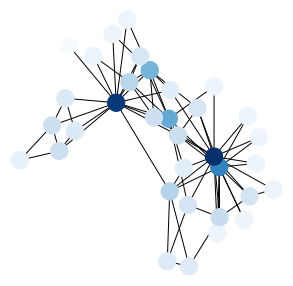

In [15]:

# グラフの構築
G = nx.karate_club_graph()

pr = nx.pagerank(G)

pos = nx.spring_layout(G)

plt.figure(figsize=(5, 5))
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=list(pr.values()), cmap=plt.cm.Blues)
plt.axis('off')
plt.show()

In [18]:
import networkx as nx

G = nx.DiGraph()
nx.add_path(G, [3, 5, 4, 1, 0, 2, 7, 8, 9, 6])
nx.add_path(G, [3, 0, 6, 4, 2, 7, 1, 9, 8, 5])

nx.nx_agraph.view_pygraphviz(G, prog='fdp')  # pygraphvizが必要

('/var/folders/h4/135_xrrj67907s9v_pnxtwm80000gp/T/tmpa2qlmkbn.png',
 <AGraph <Swig Object of type 'Agraph_t *' at 0x126aacb10>>)

In [17]:
!pip install pygraphviz

     |████████████████████████████████| 118 kB 5.3 MB/s eta 0:00:01
  Created wheel for pygraphviz: filename=pygraphviz-1.7-cp38-cp38-macosx_10_9_x86_64.whl size=101613 sha256=c220a9dc1f6c1c3385f641809842b313e58c7d27d3456a5aa128873a2d238a46
  Stored in directory: /Users/hiroshi.wayama/Library/Caches/pip/wheels/77/c6/8b/566e1c26d0f9d41093e28d8e1768f1412d54846e3296114feb
Successfully built pygraphviz
You should consider upgrading via the '/Users/hiroshi.wayama/anaconda3/bin/python -m pip install --upgrade pip' command.


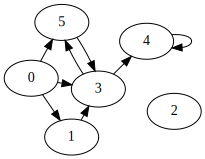

In [30]:
import networkx as nx
from IPython.display import SVG, display

G = nx.DiGraph()
# nx.add_path(G, [3, 5, 4, 1, 0, 2, 7, 8, 9, 6])
# nx.add_path(G, [3, 0, 6, 4, 2, 7, 1, 9, 8, 5])

# nx.add_path(G, [3, 5])
# nx.add_path(G, [3, 0])

G.add_nodes_from([0, 1, 2, 3, 4])
G.add_edges_from([(1, 3), (3, 5), (3, 4), (0, 3), (5, 3), (4, 4), (0, 1), (0, 5)])

svg = SVG(nx.nx_agraph.to_agraph(G).draw(prog='fdp', format='svg'))
display(svg)

$$
r\left(P_{i}\right)=\sum_{P_{j} \in B_{P_{i}}} \frac{r\left(P_{j}\right)}{\left|P_{j}\right|}
$$

隣接行列$P_{ij}$は以下の通りになります。ノード$i$からノード$j$にエッジがあれば1をなければ0の成分を持つ行列になります。

$$
\mathbf{P} = \left(\begin{array}{cccccc}
0 & 1 & 0 & 1 & 0 & 1 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 1 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 & 0 & 0
\end{array}\right)
$$

これをすべての行の和が1になるように、確率行列$H_{ij}$を考えます。

$$
\mathbf{H} = \left(\begin{array}{cccccc}
0 & 1/3 & 0 & 1/3 & 0 & 1/3 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 / 2 & 1 / 2 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 & 0 & 0
\end{array}\right)
$$

ただし、これだと第2行の成分がすべて0であり、後に述べるべき乗法による収束性が悪くなります。よって、すべての成分が0の行には、$\displaystyle \frac{1}{n}$の成分を持つように修正を加えます。

$$
\mathbf{S} = \mathbf{H} + \frac{\mathbf{a}\mathbf{e^T}}{n} = \left(\begin{array}{cccccc}
0 & 1/3 & 0 & 1/3 & 0 & 1/3 \\
0 & 0 & 0 & 1 & 0 & 0 \\
1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 \\
0 & 0 & 0 & 0 & 1 / 2 & 1 / 2 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 & 0 & 0
\end{array}\right)
$$

$\displaystyle \mathbf{a}$は$i$行の要素がすべて0であれば1、そうでなければ0の成分を持つベクトルになります。

という形で、


$$
\mathbf{G}=\alpha \mathbf{S}+(1-\alpha) \mathbf{e e}^{T} / n 
$$

このGをGoogle行列といいます。

次に、$\alpha = 0.3$として、実際にGoogle行列の固有ベクトルを求め、PageRankを計算してみます。

In [77]:
# Sの計算
S = np.array([
  [0, 1/3, 0, 1/3, 0, 1/3],
  [0, 0, 0, 1, 0, 0],
  [1/6, 1/6, 1/6, 1/6, 1/6, 1/6],
  [0, 0, 0, 0, 1/2, 1/2],
  [0, 0, 0, 0, 1, 0],
  [0, 0, 0, 1, 0, 0],
]
)
S

array([[0.        , 0.33333333, 0.        , 0.33333333, 0.        ,
        0.33333333],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.        , 0.        , 0.        , 0.        , 0.5       ,
        0.5       ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]])

In [87]:
alpha = 0.7
G = alpha * S + (1 - alpha) * np.ones((6,6)) / 6
G

array([[0.05      , 0.28333333, 0.05      , 0.28333333, 0.05      ,
        0.28333333],
       [0.05      , 0.05      , 0.05      , 0.75      , 0.05      ,
        0.05      ],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.05      , 0.05      , 0.05      , 0.05      , 0.4       ,
        0.4       ],
       [0.05      , 0.05      , 0.05      , 0.05      , 0.75      ,
        0.05      ],
       [0.05      , 0.05      , 0.05      , 0.75      , 0.05      ,
        0.05      ]])

このGoogle行列を使って、固有値1の固有ベクトルを計算します。

## べき乗法による固有ベクトルの計算

通常、Google行列は巨大なサイズになるため、解析的に求める事は出来ません。よってべき乗法という手法が用いられます。

In [102]:
piT = np.array([1 for i in range(6)]) / 6
piT

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [103]:
for i in range(5):
  piT = np.dot(piT, G)

In [104]:
piT

array([0.05660615, 0.06981846, 0.05660615, 0.23086753, 0.43448484,
       0.15161687])

## numpyによる固有値1の固有ベクトルの計算

べき乗法の結果を確かめるために、numpyで固有ベクトルを計算してみます。

In [100]:
ret = np.linalg.eig(G.T)
ret

(array([ 1.00000000e+00+0.00000000e+00j, -4.94974747e-01+0.00000000e+00j,
         4.94974747e-01+0.00000000e+00j, -2.92237077e-16+8.50412879e-09j,
        -2.92237077e-16-8.50412879e-09j,  1.16666667e-01+0.00000000e+00j]),
 array([[ 1.06476080e-01+0.00000000e+00j,  5.11651005e-17+0.00000000e+00j,
          5.09626608e-17+0.00000000e+00j,  3.17996523e-16-2.57714020e-08j,
          3.17996523e-16+2.57714020e-08j, -1.74821640e-01+0.00000000e+00j],
        [ 1.31320499e-01+0.00000000e+00j,  3.46882037e-18+0.00000000e+00j,
         -3.72987590e-17+0.00000000e+00j, -7.07106781e-01+0.00000000e+00j,
         -7.07106781e-01-0.00000000e+00j, -5.24464919e-01+0.00000000e+00j],
        [ 1.06476080e-01+0.00000000e+00j, -9.53925603e-17+0.00000000e+00j,
          6.92427457e-18+0.00000000e+00j,  1.10198775e-15+7.88171169e-23j,
          1.10198775e-15-7.88171169e-23j, -1.74821640e-01+0.00000000e+00j],
        [ 4.17442646e-01+0.00000000e+00j,  7.94104488e-01+0.00000000e+00j,
          4.75963149e-0

retの第一成分が固有値、第二成分が固有値に対応する固有ベクトルになります。固有値1が第一列なので、以下の様に固有値1の固有ベクトルを正規化して求める事出来ます。

In [101]:
pr = ret[1][:, 0] / np.sum(ret[1][:, 0])
np.abs(pr)

array([0.05660377, 0.06981132, 0.05660377, 0.22191678, 0.44758216,
       0.14748219])